# Emotion detector

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("version:",tf.__version__)

version: 2.16.1


# dataset

In [4]:
images= glob("train/**/**")

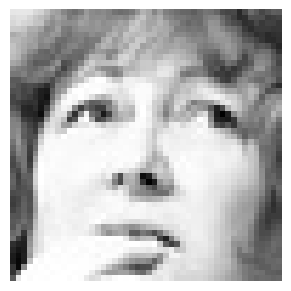

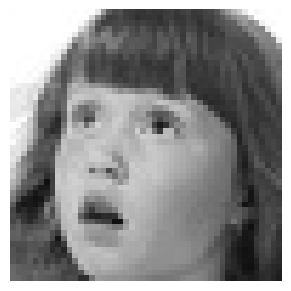

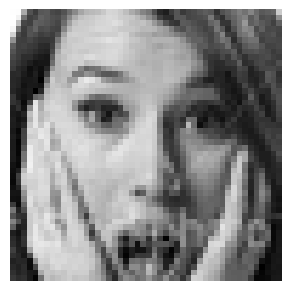

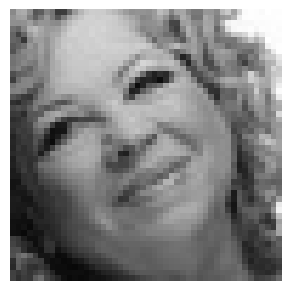

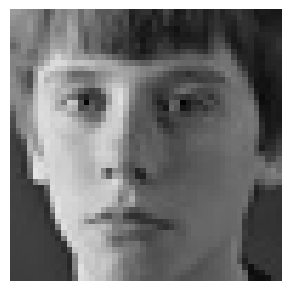

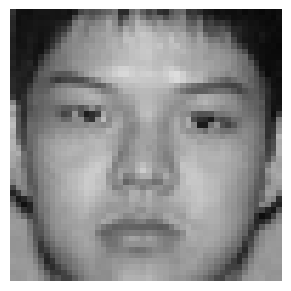

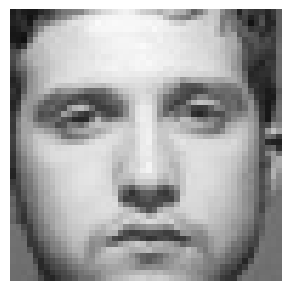

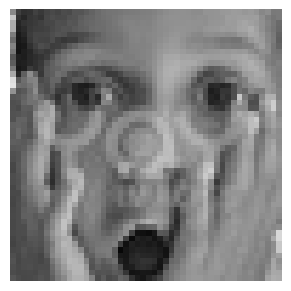

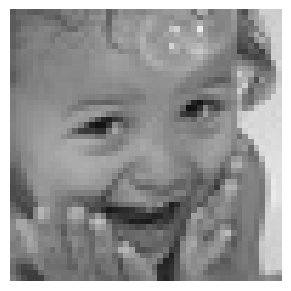

In [5]:
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [8]:
img_size=48
batch_size = 64
data_train= ImageDataGenerator()
train_gen = data_train.flow_from_directory("train/",
                                           target_size = (img_size,img_size),
                                           color_mode = "grayscale",
                                           batch_size = batch_size,
                                           class_mode= "categorical",
                                           shuffle =True)
data_val= ImageDataGenerator()
train_val = data_val.flow_from_directory("test/",
                                           target_size = (img_size,img_size),
                                           color_mode = "grayscale",
                                           batch_size = batch_size,
                                           class_mode= "categorical",
                                           shuffle =True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# models

In [16]:
def con(input_tensor,filters,kernal_size):
    x=Conv2D(filters=filters,kernel_size=kernal_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x= Activation('relu')(x)
    x=  MaxPooling2D(pool_size=(2,2))(x)
    x= Dropout(0.25)(x)
    return x

In [17]:
def Dense_f(input_tensor,nodes):
    x= Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x

In [20]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1 = con(inputs,32,(3,3))
    conv_2 = con(inputs,64,(5,5))
    conv_3 = con(inputs,128,(3,3))

    flatten= Flatten()(conv_3)
    dense_1=Dense_f(flatten,256)

    output = Dense(7,activation="softmax")(dense_1)
    model = Model(inputs=[inputs],outputs =[output])
    model.compile(loss= ['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model

In [21]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_3            │ (None, 48, 48, 1) │         0 │
│ (InputLayer)             │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_5 (Conv2D)        │ (None, 48, 48,    │     1,280 │
│                          │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ batch_normalization_5    │ (None, 48, 48,    │       512 │
│ (BatchNormalization)     │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ activation_5             │ (None, 48, 48,    │         0 │
│ (Activation)             │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_5          │ (None, 24, 24,    │         0 │
│ (MaxPooling2D)           │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_5 (Dropout)      │ (None, 24, 24,    │         0 │
│                          │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten_1 (Flatten)      │ (None, 73728)     │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 256)       │ 18,874,6… │
├──────────────────────────┼───────────────────┼───────────┤
│ batch_normalization_6    │ (None, 256)       │     1,024 │
│ (BatchNormalization)     │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ activation_6             │ (None, 256)       │         0 │
│ (Activation)             │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_6 (Dropout)      │ (None, 256)       │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 7)         │     1,799 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)


# initialize

In [26]:
epo=15
steps_per_epo= train_gen.n//train_gen.batch_size
val_steps = train_val.n//train_val.batch_size

checkpoint = ModelCheckpoint('model.weights.h5',monitor = 'val_accuracy', save_weights_only = True,mode = 'max',verbose = 1)
callbacks= [checkpoint]

# Train

In [29]:
history = model.fit(
    x= train_gen,
    steps_per_epoch = steps_per_epo,
    epochs=epo,
    validation_data=train_val,
    validation_steps = val_steps,
    callbacks = callbacks
)

Epoch 1/15


C:\Users\chiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3350 - loss: 1.8439
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - accuracy: 0.3351 - loss: 1.8434 - val_accuracy: 0.3827 - val_loss: 1.5790
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:42 632ms/step - accuracy: 0.4062 - loss: 1.4515
Epoch 2: saving model to model.weights.h5


C:\Users\chiki\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.4515 - val_accuracy: 0.4000 - val_loss: 1.3188
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.4917 - loss: 1.3488
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 313s 697ms/step - accuracy: 0.4917 - loss: 1.3488 - val_accuracy: 0.4109 - val_loss: 1.5048
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:19 580ms/step - accuracy: 0.5156 - loss: 1.3049
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5156 - loss: 1.3049 - val_accuracy: 0.4000 - val_loss: 1.4559
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.5612 - loss: 1.1791
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 302s 674ms/step - accuracy: 0.5612 - loss: 1.1791 - val_accuracy: 0.3124 - val_loss: 1.7305
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:11 563ms/step - accuracy: 0.5000 - loss: 1.2399
Epoch 6: saving model to model.weights.h5


# model evaluation

In [31]:
model.evaluate(train_val)

113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 630ms/step - accuracy: 0.4210 - loss: 1.7306


[1.7367490530014038, 0.4260239601135254]

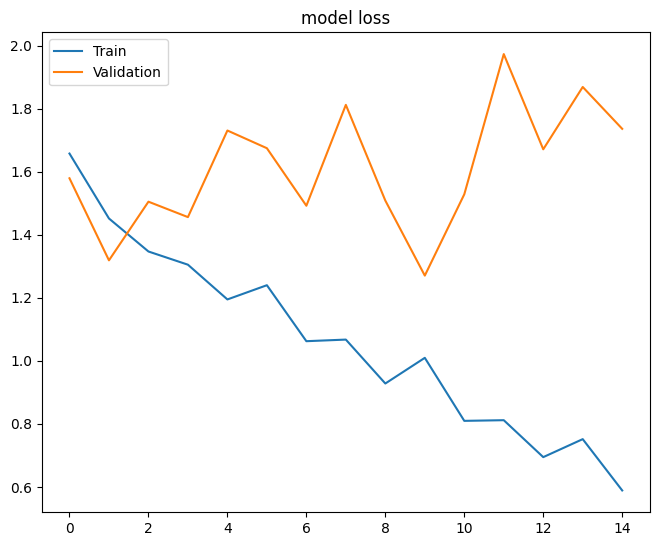

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Train',"Validation"],loc ='upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0 , right=0.95,left=0.0,hspace=0.25,wspace=0.35)

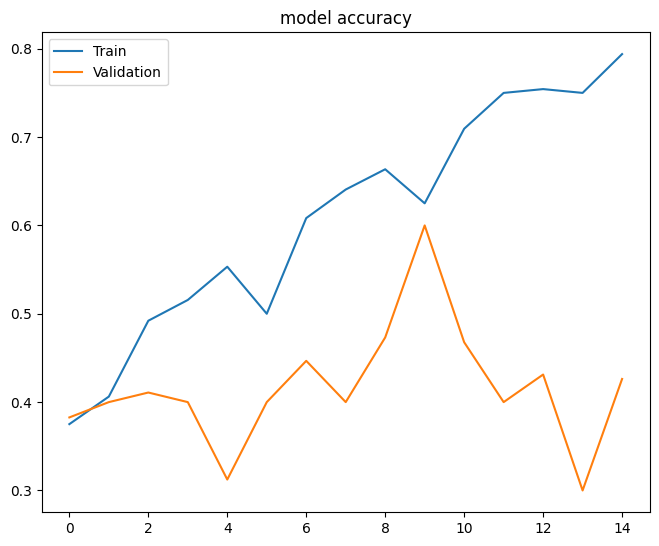

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['Train',"Validation"],loc ='upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0 , right=0.95,left=0.0,hspace=0.25,wspace=0.35)

# saving model

In [36]:
model_json = model.to_json()
with open('model_a.json',"w") as json_file:
    json_file.write(model_json)